#                         Cornell Movie Dialog Dataset Analysis by 'Webwizards'


## Contributors:
  * [Rishikesh Miriyala](https://github.com/Rishi24109)
  * [Nishith Ranjan Biswas](https://github.com/Nishith170217)


## Overview

This repository hosts the analysis of the Cornell Movie Dialogs dataset for a Natural Language Processing course project at Politecnico di Milano (Polimi). This project aims to leverage various NLP techniques to explore and model movie script dialogues, enabling a deeper understanding of conversational dynamics in films. This README outlines the dataset details, analysis methods, and insights gained from modeling efforts.

## Dataset Description

The Cornell Movie Dialogs dataset is a comprehensive compilation of movie character dialogues and associated metadata. Here are some key details:

* Source: [Cornell Movie Dialogs Dataset on Hugging Face](https://huggingface.co/datasets/cornell_movie_dialog)
* Reference Paper: [Chameleons in imagined conversations: A new approach to understanding coordination of linguistic style in dialogs](https://arxiv.org/abs/1106.3077)
* Content Description: The dataset contains movie dialogue scripts accompanied by detailed metadata, such as film title, characters involved, and more.
* Documents Type: Includes dialogues exchanged between movie characters.
* Size: Contains 220,579 conversational exchanges between 10,292 pairs of movie characters involves 9,035 characters from 617 movies.
* movie metadata included:
  1. genres
  2. release year
  3. IMDB rating
  4. number of IMDB votes
  5. IMDB rating
* character metadata included:
  1. gender (for 3,774 characters)
  2. position on movie credits (3,321 characters)

* Primary Tasks:
  * Film Dialog Generation: Generate contextually appropriate responses based on previous dialogue exchanges.
  * Prediction of Metadata: Predict metadata attributes like film title or character traits based on specific dialogues.

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd

# Importing Dataset

In [2]:
conversations = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_conversations.tsv", 
    sep='\t', 
    encoding='ISO-8859-2',
    names = ['charID_1', 'charID_2', 'movieID', 'conversation']
)

In [3]:
conversations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83097 entries, 0 to 83096
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   charID_1      83097 non-null  object
 1   charID_2      83097 non-null  object
 2   movieID       83097 non-null  object
 3   conversation  83097 non-null  object
dtypes: object(4)
memory usage: 2.5+ MB


In [4]:
conversations.head()

,charID_1,charID_2,movieID,conversation
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197']
1,u0,u2,m0,['L198' 'L199']
2,u0,u2,m0,['L200' 'L201' 'L202' 'L203']
3,u0,u2,m0,['L204' 'L205' 'L206']
4,u0,u2,m0,['L207' 'L208']


In [5]:
lines = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_lines.tsv", 
    encoding='utf-8-sig', 
    sep='\t', 
    on_bad_lines="skip", 
    header = None,
    names = ['lineID', 'charID', 'movieID', 'charName', 'text'],
    index_col=['lineID']
)

In [6]:
lines.info()

<class 'pandas.core.frame.DataFrame'>
Index: 293202 entries, L1045 to L666256
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   charID    288917 non-null  object
 1   movieID   288917 non-null  object
 2   charName  288874 non-null  object
 3   text      288663 non-null  object
dtypes: object(4)
memory usage: 11.2+ MB


In [7]:
lines.head()

,charID,movieID,charName,text
lineID,,,,
L1045,u0,m0,BIANCA,They do not!
L1044,u2,m0,CAMERON,They do to!
L985,u0,m0,BIANCA,I hope so.
L984,u2,m0,CAMERON,She okay?
L925,u0,m0,BIANCA,Let's go.


In [8]:
characters = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_characters_metadata.tsv", 
    sep='\t', 
    header = None,
    on_bad_lines= "skip",
    names = ['charID','charName','movieID','movieName','gender','score'],
    index_col=['charID']
)

In [9]:
characters.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9034 entries, u0 to u9034
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   charName   9015 non-null   object
 1   movieID    9017 non-null   object
 2   movieName  9017 non-null   object
 3   gender     9017 non-null   object
 4   score      9017 non-null   object
dtypes: object(5)
memory usage: 423.5+ KB


In [10]:
characters.head()

,charName,movieID,movieName,gender,score
charID,,,,,
u0,BIANCA,m0,10 things i hate about you,f,4
u1,BRUCE,m0,10 things i hate about you,?,?
u2,CAMERON,m0,10 things i hate about you,m,3
u3,CHASTITY,m0,10 things i hate about you,?,?
u4,JOEY,m0,10 things i hate about you,m,6


In [11]:
titles = pd.read_csv(
    "/Users/nishithranjanbiswas/Desktop/NLP/Cornell-Movie-Dialog-Analysis-NLP-Course-Project-/data/movie_titles_metadata.tsv",
    sep='\t',
    header=None,
    on_bad_lines="skip",
    names=['movieID', 'title', 'year', 'ratingIMDB', 'votes', 'genresIMDB'],
    index_col=['movieID']
)

In [12]:
titles.info()

<class 'pandas.core.frame.DataFrame'>
Index: 617 entries, m0 to m616
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   title       616 non-null    object 
 1   year        616 non-null    object 
 2   ratingIMDB  616 non-null    float64
 3   votes       616 non-null    float64
 4   genresIMDB  616 non-null    object 
dtypes: float64(2), object(3)
memory usage: 28.9+ KB


In [13]:
titles.head()

,title,year,ratingIMDB,votes,genresIMDB
movieID,,,,,
m0,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
m1,1492: conquest of paradise,1992,6.2,10421.0,['adventure' 'biography' 'drama' 'history']
m2,15 minutes,2001,6.1,25854.0,['action' 'crime' 'drama' 'thriller']
m3,2001: a space odyssey,1968,8.4,163227.0,['adventure' 'mystery' 'sci-fi']
m4,48 hrs.,1982,6.9,22289.0,['action' 'comedy' 'crime' 'drama' 'thriller']


In [14]:
# Merge the datasets
merged_df = pd.merge(conversations, lines, on='movieID')
merged_df = pd.merge(merged_df, titles, on='movieID')
#merged_df = pd.merge(merged_df, characters, on='movieID')

In [15]:
merged_df.describe()

,ratingIMDB,votes
count,4.502377e+07,4.502377e+07
mean,7.001800e+00,4.936216e+04
std,1.152501e+00,5.887215e+04
min,2.500000e+00,9.000000e+00
25%,6.400000e+00,1.196900e+04
50%,7.200000e+00,2.779100e+04
75%,7.900000e+00,6.874900e+04
max,9.300000e+00,4.193120e+05


In [16]:
merged_df.head()

,charID_1,charID_2,movieID,conversation,charID,charName,text,title,year,ratingIMDB,votes,genresIMDB
0,u0,u2,m0,['L194' 'L195' 'L196' 'L197'],u0,BIANCA,They do not!,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
1,u0,u2,m0,['L194' 'L195' 'L196' 'L197'],u2,CAMERON,They do to!,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
2,u0,u2,m0,['L194' 'L195' 'L196' 'L197'],u0,BIANCA,I hope so.,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
3,u0,u2,m0,['L194' 'L195' 'L196' 'L197'],u2,CAMERON,She okay?,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']
4,u0,u2,m0,['L194' 'L195' 'L196' 'L197'],u0,BIANCA,Let's go.,10 things i hate about you,1999,6.9,62847.0,['comedy' 'romance']


In [17]:
from collections import Counter

In [18]:
word_counts = Counter(word for sentence in merged_df for word in sentence.split())

In [19]:
vocabulary = list(word_counts.keys())

In [20]:
print("Vocabulary:", vocabulary)
print("Vocabulary Size:", len(vocabulary))

Vocabulary: ['charID_1', 'charID_2', 'movieID', 'conversation', 'charID', 'charName', 'text', 'title', 'year', 'ratingIMDB', 'votes', 'genresIMDB']
Vocabulary Size: 12


In [21]:
print(conversations[:1000])

    charID_1 charID_2 movieID                       conversation
0         u0       u2      m0      ['L194' 'L195' 'L196' 'L197']
1         u0       u2      m0                    ['L198' 'L199']
2         u0       u2      m0      ['L200' 'L201' 'L202' 'L203']
3         u0       u2      m0             ['L204' 'L205' 'L206']
4         u0       u2      m0                    ['L207' 'L208']
..       ...      ...     ...                                ...
995     u115     u121      m7          ['L8033' 'L8034' 'L8035']
996     u115     u121      m7                  ['L8036' 'L8037']
997     u115     u121      m7  ['L8094' 'L8095' 'L8096' 'L8097']
998     u115     u121      m7                  ['L8155' 'L8156']
999     u115     u121      m7  ['L8196' 'L8197' 'L8198' 'L8199']

[1000 rows x 4 columns]


In [22]:
print(lines[:1000])

       charID movieID charName                    text
lineID                                                
L1045      u0      m0   BIANCA            They do not!
L1044      u2      m0  CAMERON             They do to!
L985       u0      m0   BIANCA              I hope so.
L984       u2      m0  CAMERON               She okay?
L925       u0      m0   BIANCA               Let's go.
...       ...     ...      ...                     ...
L3329     u34      m2    JORDY     What are you doing?
L3318     u27      m2   DAPHNE    I'll get my clothes.
L3317     u34      m2    JORDY  I'll make some for us.
L3316     u27      m2   DAPHNE         In the kitchen.
L3315     u34      m2    JORDY     Do you have coffee?

[1000 rows x 4 columns]


In [23]:
dialogues = [''lines['charName'] + ' : ' + lines['text']]

In [24]:
dialogues[0]

lineID
L1045                                  BIANCA : They do not!
L1044                                  CAMERON : They do to!
L985                                     BIANCA : I hope so.
L984                                     CAMERON : She okay?
L925                                      BIANCA : Let's go.
                                 ...                        
L666371    DURNFORD : Lord Chelmsford seems to want me to...
L666370    VEREKER : I'm to take the Sikali with the main...
L666369                   DURNFORD : Your orders Mr Vereker?
L666257    DURNFORD : Good ones yes Mr Vereker. Gentlemen...
L666256    VEREKER : Colonel Durnford... William Vereker....
Length: 293202, dtype: object

In [25]:
import re
import matplotlib.pyplot as plt # drawing and visualizing data
import seaborn as sns # nicer plotting above matplotlib
import nltk # NLP library
from nltk.tokenize import word_tokenize
from tqdm.autonotebook import tqdm

/var/folders/k0/5lfd2z4n64qdlnzn62hkwr540000gn/T/ipykernel_4587/3039143079.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [26]:
conversations['conversation'] = conversations['conversation'].map(lambda x: re.findall(r"\w+", x))

# I could not find another way to filter based on the length of the conversation other than creating another column
conversations['length'] = conversations['conversation'].apply(lambda x: len(x))

conversations.sort_values(by=['length'], ascending=False)

,charID_1,charID_2,movieID,conversation,length
42477,u4522,u4525,m299,"[L135360, L135361, L135362, L135363, L135364, ...",89
73134,u7932,u7936,m537,"[L553902, L553903, L553904, L553905, L553906, ...",59
70355,u7663,u7666,m518,"[L513247, L513248, L513249, L513250, L513251, ...",56
45571,u4857,u4866,m324,"[L167261, L167262, L167263, L167264, L167265, ...",55
11348,u1240,u1243,m82,"[L267558, L267559, L267560, L267561, L267562, ...",54
...,...,...,...,...,...
20661,u2256,u2265,m145,"[L412100, L412101]",2
55457,u6020,u6022,m400,"[L308227, L308228]",2
11491,u1244,u1248,m82,"[L268306, L268307]",2
55459,u6021,u6024,m400,"[L308517, L308518]",2


In [27]:
def check_columns_existence(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"The column '{col}' does not exist in DataFrame")

# Check if columns exist in each DataFrame
check_columns_existence(characters, ['charName'])
check_columns_existence(titles, ['title'])
check_columns_existence(lines, ['charName', 'text'])
check_columns_existence(conversations, ['charID_1', 'charID_2', 'movieID', 'conversation'])

In [28]:
def get_movie_list(movies):
    movie_list = movies['title'].tolist()
    return movie_list

In [29]:
movie_list = get_movie_list(titles)
print(movie_list[:5])

['10 things i hate about you', '1492: conquest of paradise', '15 minutes', '2001: a space odyssey', '48 hrs.']


In [30]:
def extract_conversations_for_movies(movies_list, characters, movies, lines, conversations):
    movie_ids = [movies[movies['title'] == movie_title].index[0] for movie_title in movies_list]
    movie_conversations = {}

    for movie_id in movie_ids:
        # Get all conversations for this movie
        relevant_convos = conversations[conversations['movieID'] == movie_id]
        
        # If the movie title isn't already in the dictionary, add it with an empty list
        movie_title = movies.loc[movie_id].title
        if movie_title not in movie_conversations:
            movie_conversations[movie_title] = []
        
        # Loop through the relevant conversations
        for i, conversation in relevant_convos.iterrows():
            char_name1 = characters.loc[conversation['charID_1']].charName
            char_name2 = characters.loc[conversation['charID_2']].charName
            
            convo_text = []  # Create an empty list to store the lines of this conversation

            for lineID in conversation.conversation:
                try:
                    line = lines.loc[lineID]
                    convo_text.append(f"{line.charName} : {line.text}")  # Add each line to the convo_text list
                except KeyError:
                    continue

            # Join the conversation lines together into a single string and add to the movie's list
            movie_conversations[movie_title].append(' '.join(convo_text))

    return movie_conversations

In [31]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Feature Extraction using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform([' '.join(item) for item in data.values()])
tfidf_matrix

<9x4040 sparse matrix of type '<class 'numpy.float64'>'
	with 8252 stored elements in Compressed Sparse Row format>

In [33]:
# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarities = cosine_similarity(tfidf_matrix)

In [34]:
cosine_similarities

array([[1.        , 0.28399227, 0.37627293, 0.28780613, 0.30216503,
        0.30865836, 0.30798994, 0.25051429, 0.25139951],
       [0.28399227, 1.        , 0.37085065, 0.30707145, 0.29439131,
        0.3267838 , 0.30361777, 0.2355602 , 0.24326171],
       [0.37627293, 0.37085065, 1.        , 0.37257231, 0.40274556,
        0.40320718, 0.44742061, 0.32669167, 0.327119  ],
       [0.28780613, 0.30707145, 0.37257231, 1.        , 0.30672295,
        0.33616096, 0.31735647, 0.25673337, 0.25963981],
       [0.30216503, 0.29439131, 0.40274556, 0.30672295, 1.        ,
        0.32697745, 0.32350932, 0.2737099 , 0.26628887],
       [0.30865836, 0.3267838 , 0.40320718, 0.33616096, 0.32697745,
        1.        , 0.33387696, 0.26638637, 0.2668693 ],
       [0.30798994, 0.30361777, 0.44742061, 0.31735647, 0.32350932,
        0.33387696, 1.        , 0.27502758, 0.27558812],
       [0.25051429, 0.2355602 , 0.32669167, 0.25673337, 0.2737099 ,
        0.26638637, 0.27502758, 1.        , 0.65533757],


count    83097.000000
mean         3.666955
std          2.891798
min          2.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         89.000000
Name: length, dtype: float64


<Axes: xlabel='length'>

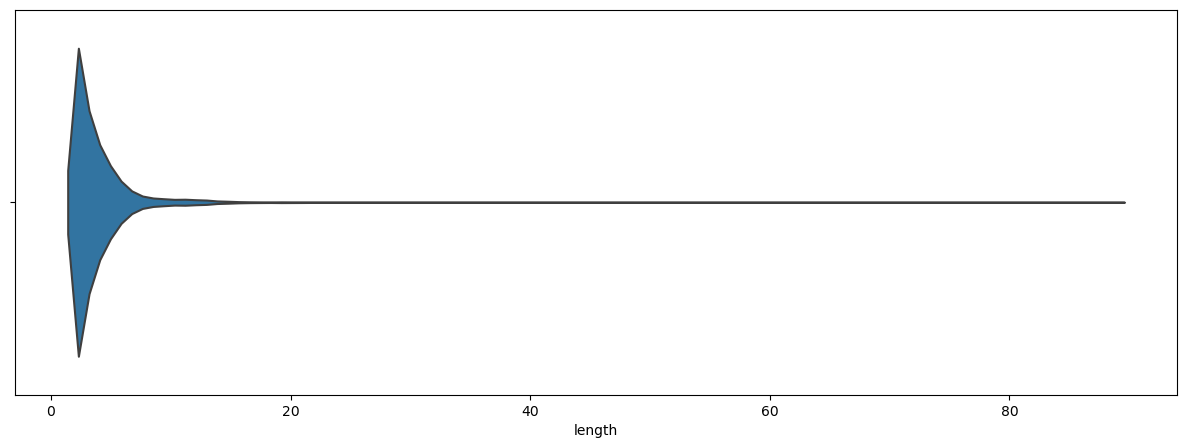

In [35]:
print(conversations.length.describe())
fig, ax = plt.subplots(figsize=(15,5))
sns.violinplot(ax=ax, x=conversations.length, inner=None)

In [36]:
def view_convo(conversation, characters, movies, lines):
    charID_1, charID_2, movieID = conversation['charID_1'], conversation['charID_2'], conversation['movieID']
    
    char1 = characters.loc[charID_1].charName
    char2 = characters.loc[charID_2].charName
    movie = movies.loc[movieID].title
    
    convo_header = f"This conversation was between {char1} and {char2}, from movie : {movie}."
    print(convo_header)
    print(f"{'-' * len(convo_header)}")

    for lineID in conversation.conversation:
        line = lines.loc[lineID]
        print(f"{line.charName} : {line.text}")

In [37]:
view_convo(conversations.iloc[0], characters, titles, lines)

This conversation was between BIANCA and CAMERON, from movie : 10 things i hate about you.
------------------------------------------------------------------------------------------
BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
CAMERON : Well I thought we'd start with pronunciation if that's okay with you.
BIANCA : Not the hacking and gagging and spitting part.  Please.
CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?


In [39]:
def view_all_convos(char_name1, char_name2, movie_title, characters, movies, lines, conversations):
    # Identify the character IDs and movie ID
    charID_1 = characters[characters['charName'] == char_name1].index[0]
    charID_2 = characters[characters['charName'] == char_name2].index[0]
    movieID = movies[movies['title'] == movie_title].index[0]


    relevant_convos = conversations[((conversations['charID_1'] == charID_1) & (conversations['charID_2'] == charID_2) |
                                     (conversations['charID_1'] == charID_2) & (conversations['charID_2'] == charID_1)) &
                                    (conversations['movieID'] == movieID)]

    # Loop through the relevant conversations
    for i, conversation in relevant_convos.iterrows():
        convo_header = f"This conversation was between {char_name1} and {char_name2}, from movie : {movie_title}."
        print(convo_header)
        print(f"{'-' * len(convo_header)}")

        for lineID in conversation.conversation:
            line = lines.loc[lineID]
            print(f"{line.charName} : {line.text}")

        print("\n\n")  # New line between different conversations

In [40]:
def check_columns_existence(df, columns):
    for col in columns:
        if col not in df.columns:
            print(f"The column '{col}' does not exist in DataFrame")

# Check if columns exist in each DataFrame
check_columns_existence(characters, ['charName'])
check_columns_existence(titles, ['title'])
check_columns_existence(lines, ['charName', 'text'])
check_columns_existence(conversations, ['charID_1', 'charID_2', 'movieID', 'conversation'])

In [41]:
def get_movie_list(movies):
    movie_list = movies['title'].tolist()
    return movie_list


In [42]:
movie_list = get_movie_list(titles)
print(movie_list[:5])

['10 things i hate about you', '1492: conquest of paradise', '15 minutes', '2001: a space odyssey', '48 hrs.']


In [43]:
def extract_conversations_for_movies(movies_list, characters, movies, lines, conversations):
    movie_ids = [movies[movies['title'] == movie_title].index[0] for movie_title in movies_list]
    movie_conversations = {}

    for movie_id in movie_ids:
        # Get all conversations for this movie
        relevant_convos = conversations[conversations['movieID'] == movie_id]
        
        # If the movie title isn't already in the dictionary, add it with an empty list
        movie_title = movies.loc[movie_id].title
        if movie_title not in movie_conversations:
            movie_conversations[movie_title] = []
        
        # Loop through the relevant conversations
        for i, conversation in relevant_convos.iterrows():
            char_name1 = characters.loc[conversation['charID_1']].charName
            char_name2 = characters.loc[conversation['charID_2']].charName
            
            convo_text = []  # Create an empty list to store the lines of this conversation

            for lineID in conversation.conversation:
                try:
                    line = lines.loc[lineID]
                    convo_text.append(f"{line.charName} : {line.text}")  # Add each line to the convo_text list
                except KeyError:
                    continue

            # Join the conversation lines together into a single string and add to the movie's list
            movie_conversations[movie_title].append(' '.join(convo_text))

    return movie_conversations

In [44]:
movies_list_test = movie_list[0:9]
data = extract_conversations_for_movies(movies_list_test, characters, titles, lines, conversations)

In [45]:
data['10 things i hate about you'][:10]

["BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again. CAMERON : Well I thought we'd start with pronunciation if that's okay with you. BIANCA : Not the hacking and gagging and spitting part.  Please. CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?",
 "BIANCA : You're asking me out.  That's so cute. What's your name again? CAMERON : Forget it.",
 "BIANCA : No no it's my fault -- we didn't have a proper introduction --- CAMERON : Cameron. BIANCA : The thing is Cameron -- I'm at the mercy of a particularly hideous breed of loser.  My sister.  I can't date until she does. CAMERON : Seems like she could get a date easy enough...",
 "CAMERON : Why? BIANCA : Unsolved mystery.  She used to be really popular when she started high school then it was just like she got sick of it or something. CAMERON : That's a shame.",
 'BIANCA : Gosh if only we could find Kat a boyfriend

In [46]:
import re

def prepare_data_for_ner(data):
    TRAIN_DATA = []
    for movie, convos in data.items():
        for convo in convos:
            entities = []
            # Using regex to find capitalized words or consecutive capitalized words, which should mostly be character names
            for m in re.finditer(r'(\b[A-Z][a-z]*\b)(\s\b[A-Z][a-z]*\b)*', convo):
                entities.append((m.start(), m.end(), 'CHARACTER'))
            TRAIN_DATA.append((convo, {"entities": entities}))
    return TRAIN_DATA

In [47]:
prepared_data = prepare_data_for_ner(data)

In [48]:
prepared_data[:10]

[("BIANCA : Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again. CAMERON : Well I thought we'd start with pronunciation if that's okay with you. BIANCA : Not the hacking and gagging and spitting part.  Please. CAMERON : Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?",
  {'entities': [(9, 12, 'CHARACTER'),
    (34, 49, 'CHARACTER'),
    (54, 68, 'CHARACTER'),
    (136, 141, 'CHARACTER'),
    (153, 159, 'CHARACTER'),
    (232, 235, 'CHARACTER'),
    (280, 286, 'CHARACTER'),
    (298, 302, 'CHARACTER'),
    (337, 343, 'CHARACTER'),
    (354, 362, 'CHARACTER'),
    (365, 370, 'CHARACTER')]}),
 ("BIANCA : You're asking me out.  That's so cute. What's your name again? CAMERON : Forget it.",
  {'entities': [(9, 12, 'CHARACTER'),
    (32, 36, 'CHARACTER'),
    (48, 52, 'CHARACTER'),
    (82, 88, 'CHARACTER')]}),
 ("BIANCA : No no it's my fault -- we didn't have a proper introduction --- 

In [49]:
import spacy
from spacy import displacy

# Load a model for English language
nlp = spacy.load("en_core_web_sm")

def process_conversations(conversations):
    conversations_entities = []
    for conversation in conversations:
        # apply NER on the conversation
        doc = nlp(conversation)
        entities = []
        for ent in doc.ents:
            # store the entity, its category and the position in the text
            entities.append((ent.text, ent.start_char, ent.end_char, ent.label_))
        conversations_entities.append(entities)
    return conversations_entities

conversations = data['10 things i hate about you']

conversations_entities = process_conversations(conversations)

for i, entities in enumerate(conversations_entities):
    print(f"Entities in conversation {i + 1}:")
    for entity in entities:
        print(entity)

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.